In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from influence.influence_model import InfluenceModel

In [4]:
mnist_dataset = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

categorical_train_labels = tf.keras.utils.to_categorical(train_labels)
categorical_test_labels = tf.keras.utils.to_categorical(test_labels)

In [5]:
num_training_points = 54000

In [6]:
tf.keras.backend.set_floatx("float64")

model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(10, kernel_regularizer="l2", bias_regularizer="l2"),
    ]
)

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [7]:
model.load_weights('../output/mnist_checkpoint')
history = model.fit(
    train_images[:num_training_points],
    categorical_train_labels[:num_training_points],
    epochs=100,
    validation_data=(test_images[0:1], categorical_test_labels[0:1])
)

Epoch 1/100
1688/1688 [==============================] - 1s 811us/step - loss: 0.6941 - accuracy: 0.8858 - val_loss: 0.2455 - val_accuracy: 1.0000
Epoch 2/100
1688/1688 [==============================] - 1s 733us/step - loss: 0.6943 - accuracy: 0.8851 - val_loss: 0.2529 - val_accuracy: 1.0000
Epoch 3/100
1688/1688 [==============================] - 1s 705us/step - loss: 0.6941 - accuracy: 0.8845 - val_loss: 0.2548 - val_accuracy: 1.0000
Epoch 4/100
1688/1688 [==============================] - 1s 741us/step - loss: 0.6942 - accuracy: 0.8852 - val_loss: 0.2401 - val_accuracy: 1.0000
Epoch 5/100
1688/1688 [==============================] - 1s 704us/step - loss: 0.6942 - accuracy: 0.8853 - val_loss: 0.2530 - val_accuracy: 1.0000
Epoch 6/100
1688/1688 [==============================] - 1s 706us/step - loss: 0.6941 - accuracy: 0.8852 - val_loss: 0.2547 - val_accuracy: 1.0000
Epoch 7/100
1688/1688 [==============================] - 1s 739us/step - loss: 0.6942 - accuracy: 0.8851 - val_loss: 0

1688/1688 [==============================] - 1s 781us/step - loss: 0.6939 - accuracy: 0.8852 - val_loss: 0.2470 - val_accuracy: 1.0000
Epoch 57/100
1688/1688 [==============================] - 1s 705us/step - loss: 0.6946 - accuracy: 0.8855 - val_loss: 0.2597 - val_accuracy: 1.0000
Epoch 58/100
1688/1688 [==============================] - 1s 761us/step - loss: 0.6944 - accuracy: 0.8839 - val_loss: 0.2475 - val_accuracy: 1.0000
Epoch 59/100
1688/1688 [==============================] - 1s 723us/step - loss: 0.6947 - accuracy: 0.8842 - val_loss: 0.2429 - val_accuracy: 1.0000
Epoch 60/100
1688/1688 [==============================] - 1s 766us/step - loss: 0.6943 - accuracy: 0.8856 - val_loss: 0.2451 - val_accuracy: 1.0000
Epoch 61/100
1688/1688 [==============================] - 1s 791us/step - loss: 0.6945 - accuracy: 0.8846 - val_loss: 0.2611 - val_accuracy: 1.0000
Epoch 62/100
1688/1688 [==============================] - 1s 761us/step - loss: 0.6942 - accuracy: 0.8850 - val_loss: 0.2578 

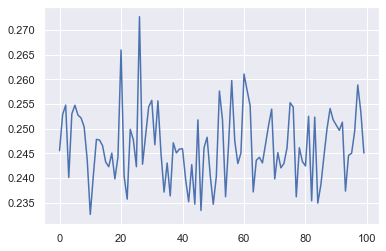

In [8]:
plt.plot(history.history['val_loss'])

In [9]:
model.evaluate(test_images[0:1], categorical_test_labels[0:1])

1/1 [==============================] - 0s 1000us/step - loss: 0.2450 - accuracy: 1.0000


[0.24503927900691852, 1.0]

In [10]:
model.loss(model.predict(test_images[0:1]), categorical_test_labels[0:1])

<tf.Tensor: shape=(), dtype=float32, numpy=-6.010802>

In [11]:
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
loss_fn(model.predict(test_images[0:1]), categorical_test_labels[0:1])

<tf.Tensor: shape=(), dtype=float32, numpy=-6.010802>